In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to CSV files
train_csv = '../data/fairface_label_train.csv'
val_csv   = '../data/fairface_label_val.csv'

# Load them into separate dataframes
df_train = pd.read_csv(train_csv)
df_val   = pd.read_csv(val_csv)

# Quick glance
print("Train DataFrame:\n", df_train.head())
print("\nVal DataFrame:\n", df_val.head())



Train DataFrame:
           file    age  gender        race  service_test
0  train/1.jpg  50-59    Male  East Asian          True
1  train/2.jpg  30-39  Female      Indian         False
2  train/3.jpg    3-9  Female       Black         False
3  train/4.jpg  20-29  Female      Indian          True
4  train/5.jpg  20-29  Female      Indian          True

Val DataFrame:
         file    age  gender             race  service_test
0  val/1.jpg    3-9    Male       East Asian         False
1  val/2.jpg  50-59  Female       East Asian          True
2  val/3.jpg  30-39    Male            White          True
3  val/4.jpg  20-29  Female  Latino_Hispanic          True
4  val/5.jpg  20-29    Male  Southeast Asian         False


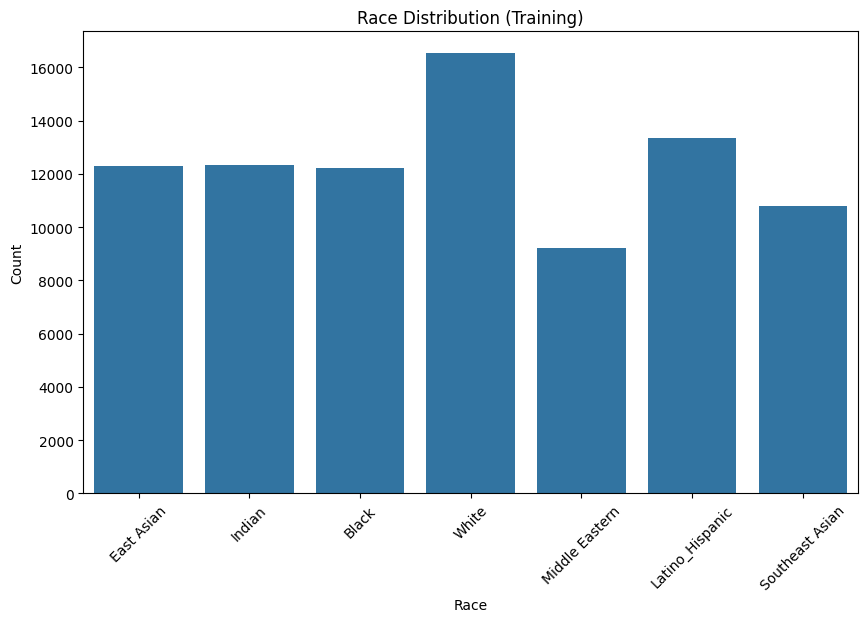

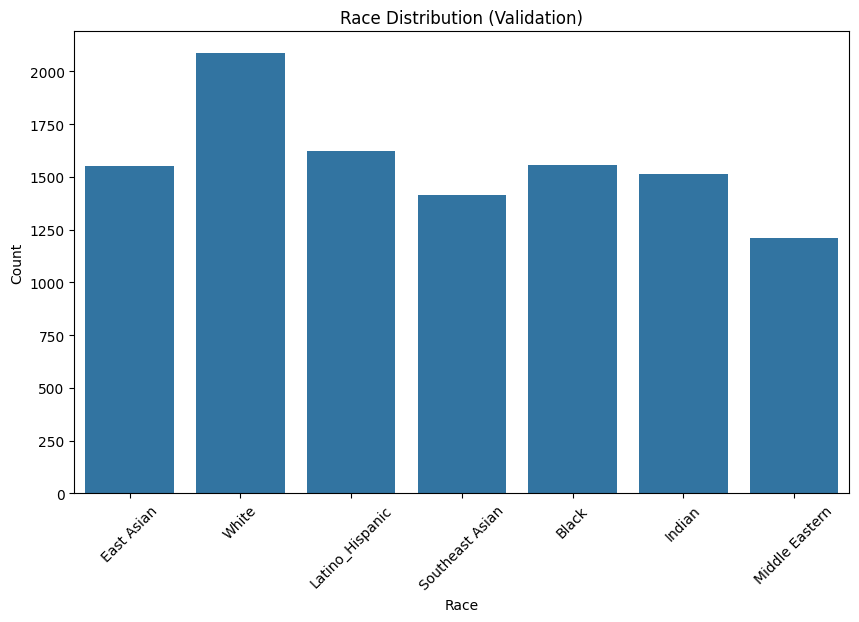

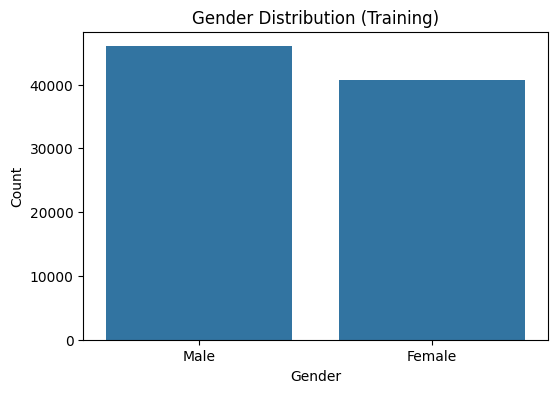

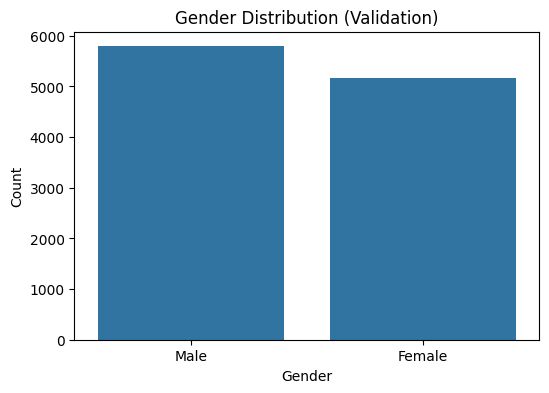

In [3]:
# Race Distribution in training data
plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='race')
plt.title('Race Distribution (Training)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Race distribution in validation data
plt.figure(figsize=(10,6))
sns.countplot(data=df_val, x='race')
plt.title('Race Distribution (Validation)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Gender Distribution in training data
plt.figure(figsize=(6,4))
sns.countplot(data=df_train, x='gender')
plt.title('Gender Distribution (Training)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Geneder Distribution in validation data
plt.figure(figsize=(6,4))
sns.countplot(data=df_val, x='gender')
plt.title('Gender Distribution (Validation)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

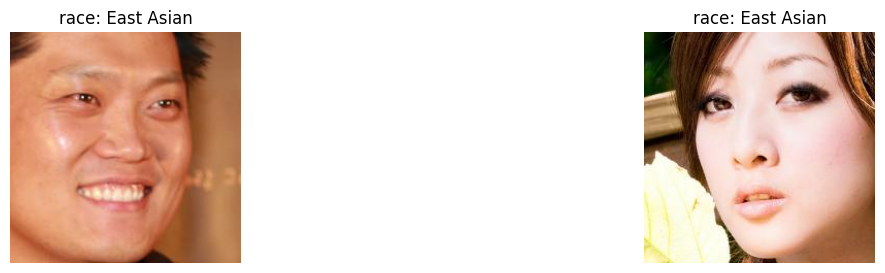

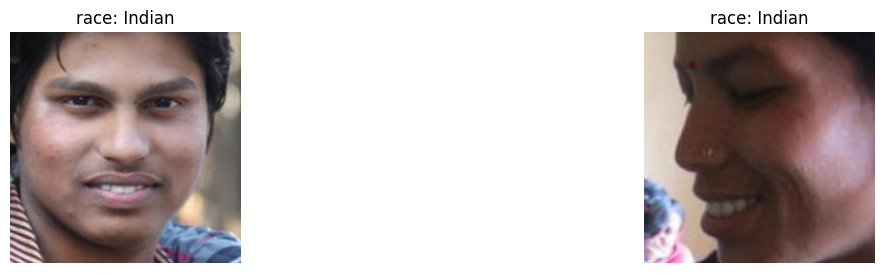

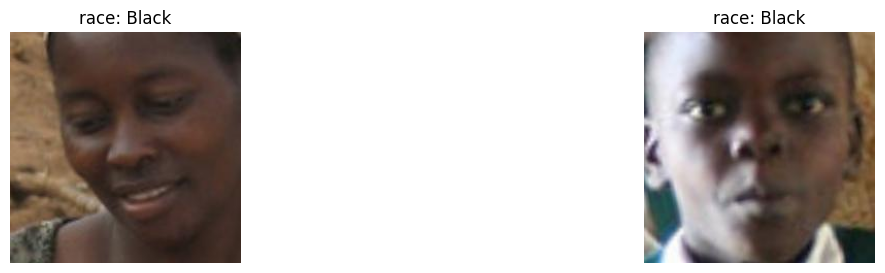

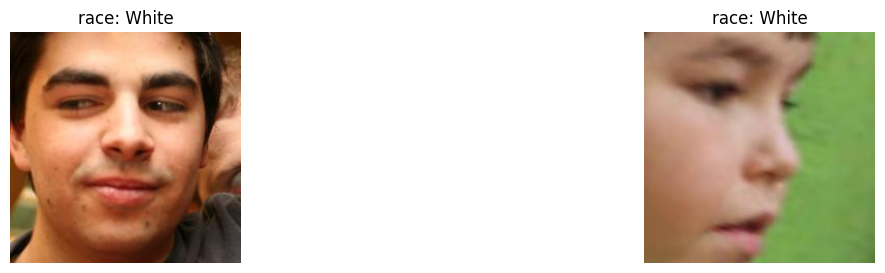

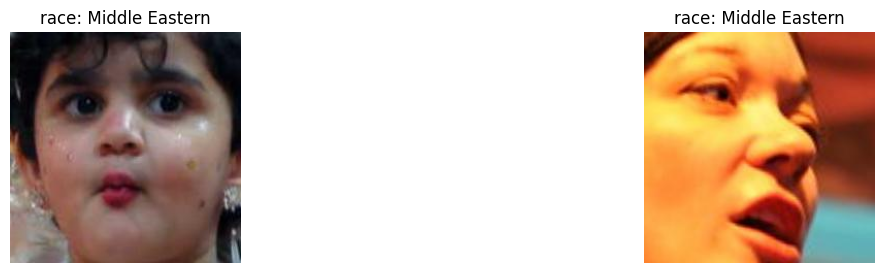

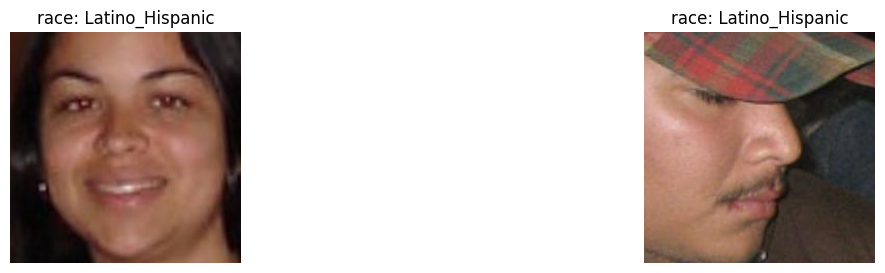

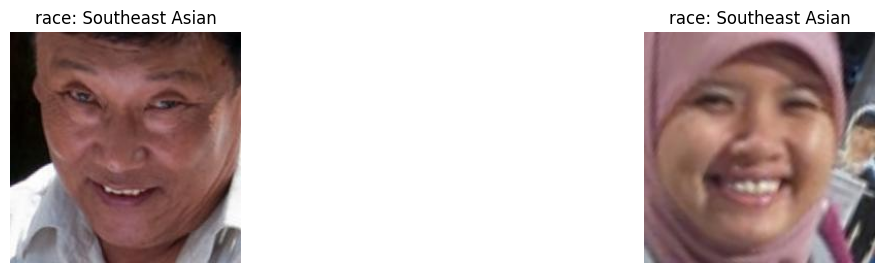

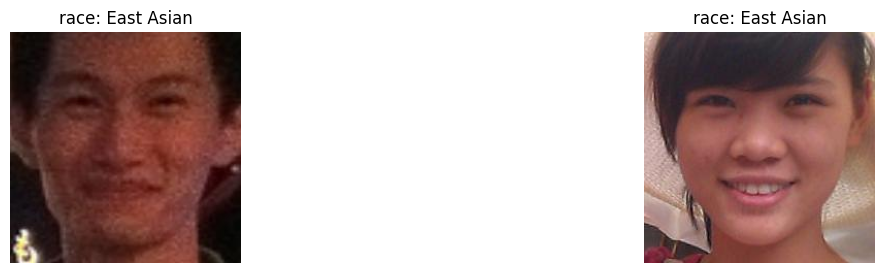

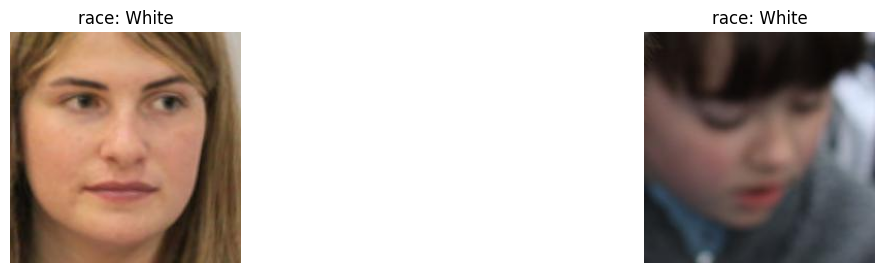

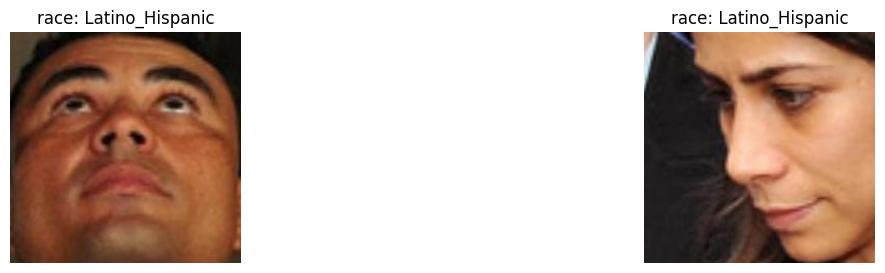

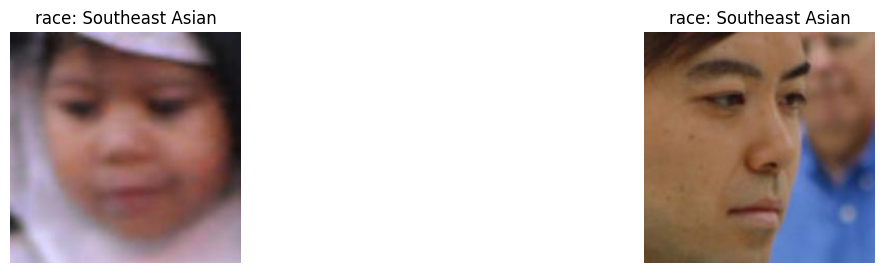

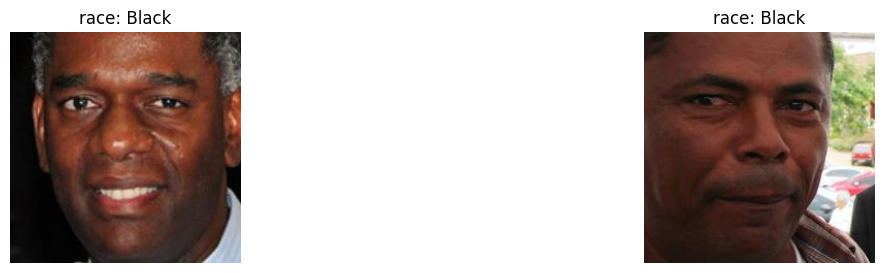

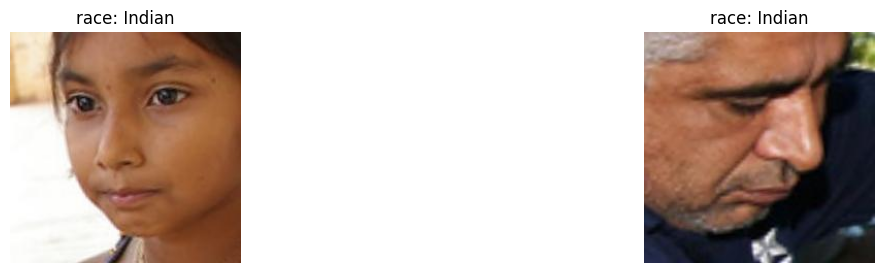

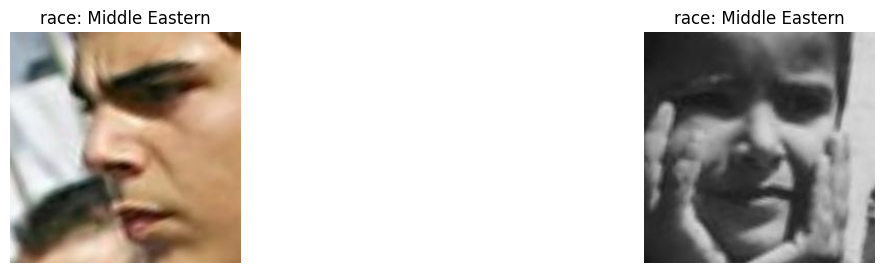

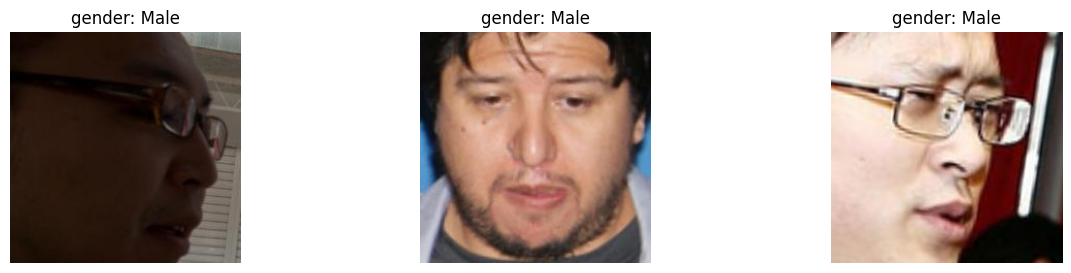

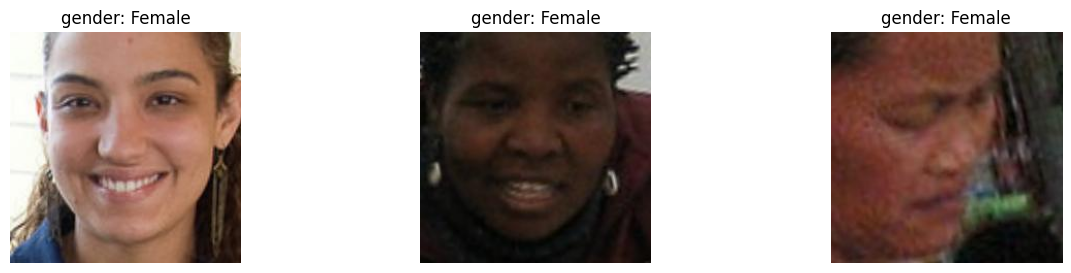

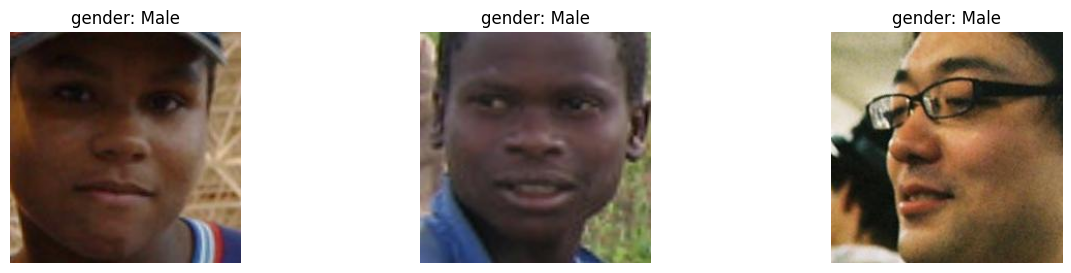

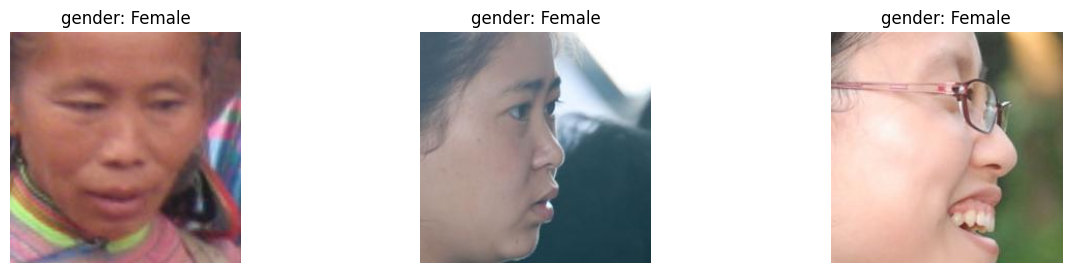

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_samples(df, label, label_value, num_samples=3):
    subset = df[df[label] == label_value].sample(n=num_samples)
    plt.figure(figsize=(15,3))
    for i, (_, row) in enumerate(subset.iterrows()):
        img_path = row['file']  # Adjust column if needed
        # Note we prepend the folder name
        full_path = f"../data/fairface/{img_path}"
        image = cv2.imread(full_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"{label}: {label_value}")
    plt.show()

# Display samples for each race category
races = df_train['race'].unique()
for race in races:
    display_samples(df_train, 'race', race, num_samples=2)

races_val = df_val['race'].unique()
for race in races_val:
    display_samples(df_val, 'race', race, num_samples=2)


# Display samples for each gender category
genders = df_val['gender'].unique()
for gender in genders:
    display_samples(df_val, 'gender', gender, num_samples=3)

genders = df_val['gender'].unique()
for gender in genders:
    display_samples(df_val, 'gender', gender, num_samples=3)



In [5]:
# Race categories
race_mapping = {
   'White': 0, 
   'Black': 1, 
   'East Asian': 2,
   'Southeast Asian': 3, 
   'Indian': 4,
   'Latino_Hispanic': 5, 
   'Middle Eastern': 6
   # Adjust if needed
}

gender_mapping = {'Male': 0, 'Female': 1}

# Apply to df_train
df_train['race_encoded'] = df_train['race'].map(race_mapping)
df_train['gender_encoded'] = df_train['gender'].map(gender_mapping)

# Apply to df_val
df_val['race_encoded'] = df_val['race'].map(race_mapping)
df_val['gender_encoded'] = df_val['gender'].map(gender_mapping)



In [6]:
df_train.to_csv('../data/fairface_label_train_encoded.csv', index=False)
df_val.to_csv('../data/fairface_label_val_encoded.csv', index=False)

Original Training Set Size: 86744
Original Validation Set Size: 10954
New Validation Set Size: 8763
Test Set Size: 2191

New validation and test sets have been saved successfully.


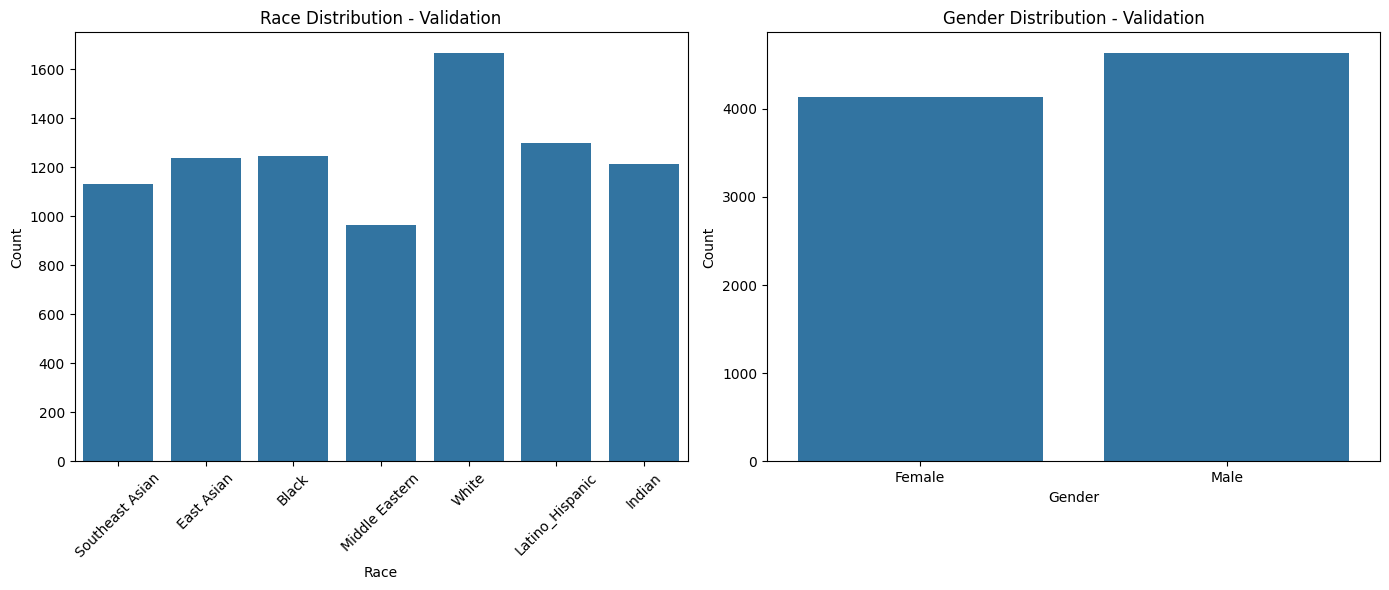

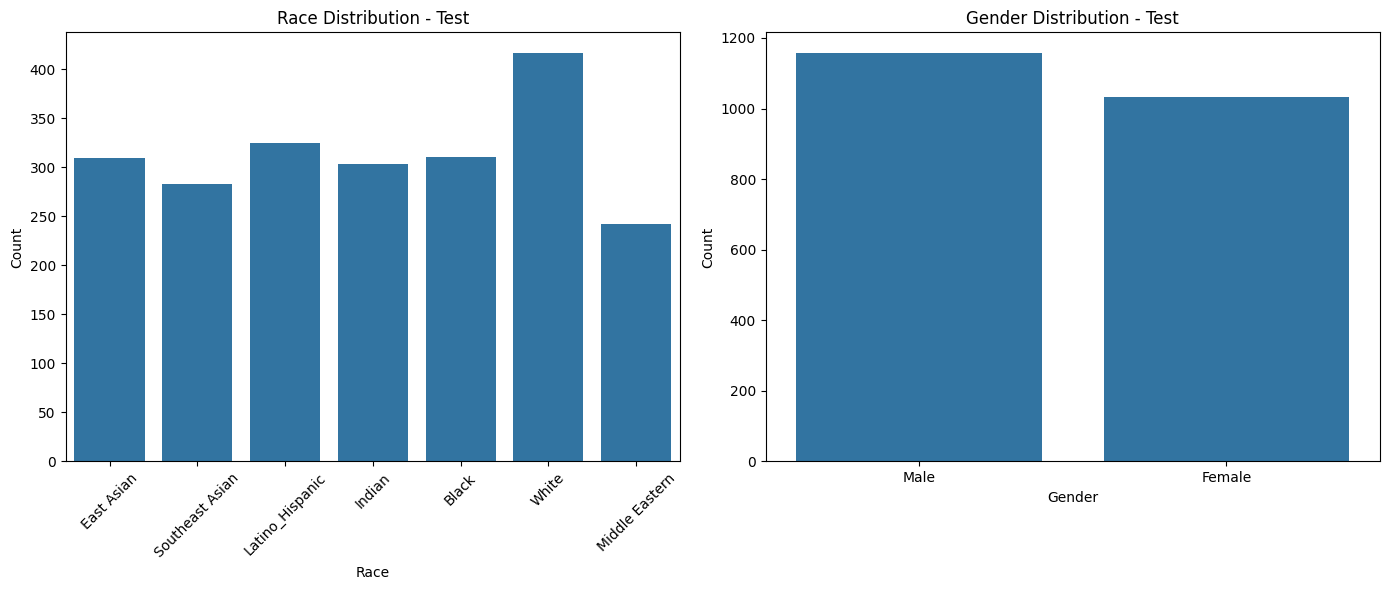

In [7]:
from sklearn.model_selection import train_test_split

# Define the test size (e.g., 20% of the original validation set)
test_size = 0.2

# Perform the split with stratification to maintain label distributions
df_val_new, df_test = train_test_split(
    df_val, 
    test_size=test_size, 
    stratify=df_val[['race_encoded', 'gender_encoded']], 
    random_state=42
)

# Reset indices
df_val_new.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Verify the sizes
print(f"Original Training Set Size: {len(df_train)}")
print(f"Original Validation Set Size: {len(df_val)}")
print(f"New Validation Set Size: {len(df_val_new)}")
print(f"Test Set Size: {len(df_test)}")

# 2.3.3 Save the New Splits as Separate CSV Files
df_val_new.to_csv('../data/fairface_label_val_encoded.csv', index=False)
df_test.to_csv('../data/fairface_label_test_encoded.csv', index=False)

print("\nNew validation and test sets have been saved successfully.")

# 2.3.4 Visualize the Distributions in the New Splits

def plot_distribution(df, split_name):
    plt.figure(figsize=(14,6))

    # Race Distribution
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='race')
    plt.title(f'Race Distribution - {split_name}')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Gender Distribution
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='gender')
    plt.title(f'Gender Distribution - {split_name}')
    plt.xlabel('Gender')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

# Plot distributions for the new Validation Set
plot_distribution(df_val_new, 'Validation')

# Plot distributions for the Test Set
plot_distribution(df_test, 'Test')

In [8]:
# Optional: Check overall distribution consistency
def check_distribution_consistency(original_df, new_split_df, split_name):
    print(f"\nDistribution Comparison for {split_name} Split:")
    for label in ['race', 'gender']:
        original_counts = original_df[label].value_counts(normalize=True).sort_index()
        split_counts = new_split_df[label].value_counts(normalize=True).sort_index()
        comparison = pd.DataFrame({
            'Original': original_counts,
            split_name: split_counts
        })
        print(f"\n{label.capitalize()} Distribution:")
        print(comparison)

# Compare distributions
check_distribution_consistency(df_val, df_val_new, 'Validation')
check_distribution_consistency(df_val, df_test, 'Test')


Distribution Comparison for Validation Split:

Race Distribution:
                 Original  Validation
race                                 
Black            0.142049    0.142075
East Asian       0.141501    0.141504
Indian           0.138397    0.138423
Latino_Hispanic  0.148165    0.148123
Middle Eastern   0.110371    0.110350
Southeast Asian  0.129177    0.129180
White            0.190341    0.190346

Gender Distribution:
        Original  Validation
gender                      
Female  0.471243    0.471186
Male    0.528757    0.528814

Distribution Comparison for Test Split:

Race Distribution:
                 Original      Test
race                               
Black            0.142049  0.141944
East Asian       0.141501  0.141488
Indian           0.138397  0.138293
Latino_Hispanic  0.148165  0.148334
Middle Eastern   0.110371  0.110452
Southeast Asian  0.129177  0.129165
White            0.190341  0.190324

Gender Distribution:
        Original      Test
gender             

In [6]:
'''
4.1 Face Detection with OpenCV's Haar Cascade
'''

import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import h5py

# Define the face detection function using Haar Cascade
def detect_and_crop_face_haar(image_path, desired_size=(224, 224)):
    """
    Uses OpenCV's Haar Cascade to detect, crop, and resize a face.
    Skips detection if image is already the desired_size.
    Returns None if no face is detected or the image can't be read.
    """
    # Initialize Haar Cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if face_cascade.empty():
        raise IOError("Unable to load the Haar Cascade classifier xml file.")
    
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"[HAAR] Warning: Unable to read {image_path}")
        return None
    
    # If already desired size, assume it's pre-cropped
    if (image.shape[0], image.shape[1]) == desired_size:
        return image
    
    # Convert to grayscale for detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )
    
    if len(faces) == 0:
        print(f"[HAAR] No face detected in {image_path}")
        return None

    # Crop the first detected face
    (x, y, w, h) = faces[0]
    cropped_face = image[y:y+h, x:x+w]
    
    # Resize to desired size
    resized_face = cv2.resize(cropped_face, desired_size)
    return resized_face


In [8]:
'''
4.2 Preprocessing the Data with Face Detection
'''

# Define the preprocessing function with HDF5 and batching
def preprocess_split_hdf5(df, split_name, log_file, hdf5_file, batch_size=1000):
    """
    Processes images in a given split by detecting and cropping faces.
    Saves the processed data to an HDF5 file in batches.
    """
    num_samples = len(df)
    desired_size = (224, 224)
    
    # Initialize HDF5 file with extendable datasets
    with h5py.File(hdf5_file, 'w') as h5f:
        # Initial allocation with maxshape set to None for unlimited
        h5f.create_dataset('images', shape=(0, *desired_size, 3), maxshape=(None, *desired_size, 3), dtype=np.uint8, chunks=True)
        h5f.create_dataset('races', shape=(0,), maxshape=(None,), dtype=int, chunks=True)
        h5f.create_dataset('genders', shape=(0,), maxshape=(None,), dtype=int, chunks=True)
        
        processed_count = 0
        for start in tqdm(range(0, num_samples, batch_size), desc=f"Processing {split_name} split"):
            end = min(start + batch_size, num_samples)
            batch_df = df.iloc[start:end]
            
            batch_images = []
            batch_races = []
            batch_genders = []
            
            for _, row in batch_df.iterrows():
                img_relative_path = row['file']  # Adjust if column name differs
                img_full_path = os.path.join('../data/fairface', img_relative_path)
                
                cropped_face = detect_and_crop_face_haar(img_full_path)
                if cropped_face is not None:
                    # Convert BGR to RGB
                    cropped_face = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB)
                    batch_images.append(cropped_face)
                    batch_races.append(row['race_encoded'])
                    batch_genders.append(row['gender_encoded'])
                else:
                    log_file.write(f"{split_name}/{img_relative_path}\n")
            
            # Convert lists to NumPy arrays
            if batch_images:
                batch_images_np = np.array(batch_images, dtype=np.uint8)
                batch_races_np = np.array(batch_races, dtype=int)
                batch_genders_np = np.array(batch_genders, dtype=int)
                
                # Append to HDF5 datasets
                h5f['images'].resize(processed_count + len(batch_images_np), axis=0)
                h5f['images'][processed_count:processed_count + len(batch_images_np)] = batch_images_np
                
                h5f['races'].resize(processed_count + len(batch_races_np), axis=0)
                h5f['races'][processed_count:processed_count + len(batch_races_np)] = batch_races_np
                
                h5f['genders'].resize(processed_count + len(batch_genders_np), axis=0)
                h5f['genders'][processed_count:processed_count + len(batch_genders_np)] = batch_genders_np
                
                processed_count += len(batch_images_np)
        
        print(f"{split_name.capitalize()} split processed: {processed_count} samples saved.")

# CSV file paths
train_csv_encoded = '../data/fairface_label_train_encoded.csv'
val_csv_encoded   = '../data/fairface_label_val_encoded.csv'
test_csv_encoded  = '../data/fairface_label_test_encoded.csv'

# Read the CSV files
df_train_encoded = pd.read_csv(train_csv_encoded)
df_val_encoded   = pd.read_csv(val_csv_encoded)
df_test_encoded  = pd.read_csv(test_csv_encoded)

# Log file for images with no detected faces
no_face_log_path = '../data/no_face_detected.log'

with open(no_face_log_path, 'w') as no_face_log:
    # --- TRAIN ---
    preprocess_split_hdf5(
        df_train_encoded, 
        'train', 
        no_face_log, 
        '../data/train.h5',
        batch_size=1000
    )
    
    # --- VAL ---
    preprocess_split_hdf5(
        df_val_encoded, 
        'val', 
        no_face_log, 
        '../data/val.h5',
        batch_size=1000
    )
    
    # --- TEST ---
    preprocess_split_hdf5(
        df_test_encoded, 
        'test',  
        no_face_log, 
        '../data/test.h5',
        batch_size=1000
    )


Processing train split: 100%|██████████| 87/87 [16:27<00:00, 11.35s/it]


Train split processed: 86744 samples saved.


Processing val split: 100%|██████████| 9/9 [01:38<00:00, 10.89s/it]


Val split processed: 8763 samples saved.


Processing test split: 100%|██████████| 3/3 [00:24<00:00,  8.20s/it]

Test split processed: 2191 samples saved.


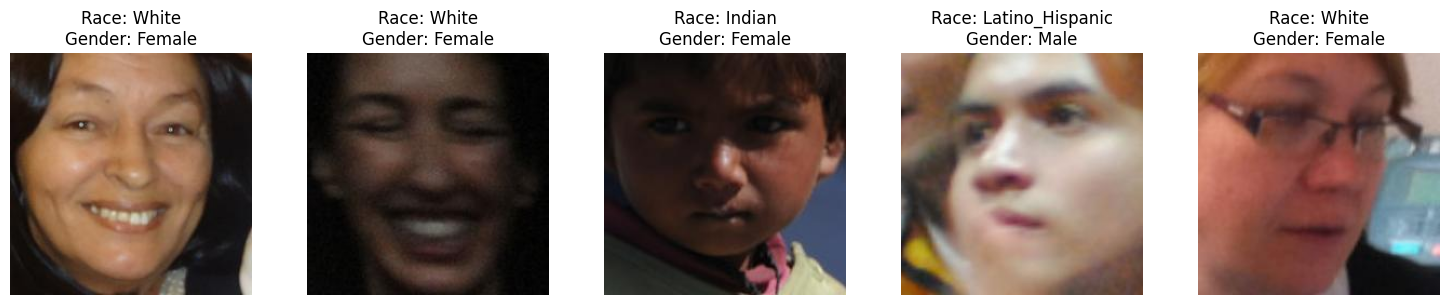

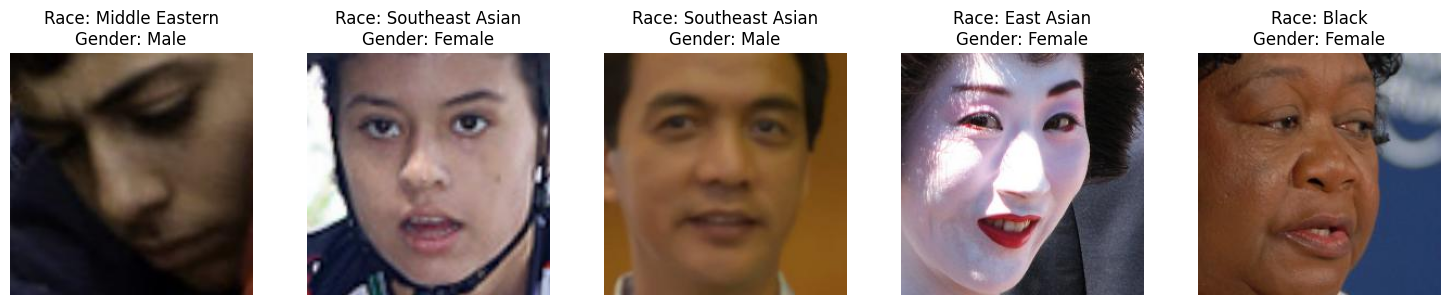

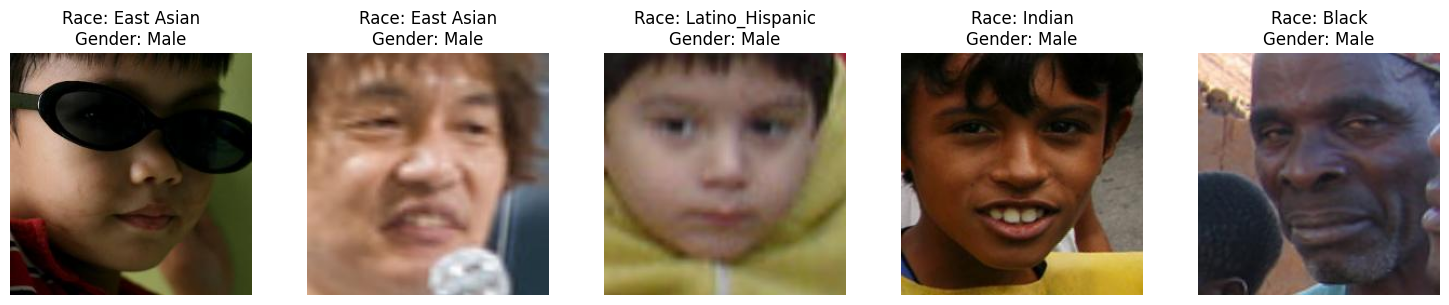

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Define reverse mappings for labels
race_map_rev = {
    0: 'White', 
    1: 'Black', 
    2: 'East Asian', 
    3: 'Southeast Asian', 
    4: 'Indian', 
    5: 'Latino_Hispanic', 
    6: 'Middle Eastern'
}
gender_map_rev = {
    0: 'Male', 
    1: 'Female'
}

def display_samples_hdf5(hdf5_path, race_map, gender_map, num_samples=5):
    """
    Displays a specified number of random samples from an HDF5 file without loading all data into memory.
    
    Args:
        hdf5_path (str): Path to the HDF5 file.
        race_map (dict): Mapping from race indices to race names.
        gender_map (dict): Mapping from gender indices to gender names.
        num_samples (int): Number of samples to display.
    """
    with h5py.File(hdf5_path, 'r') as h5f:
        num_images = h5f['images'].shape[0]
        
        if num_samples > num_images:
            num_samples = num_images
            print(f"Requested {num_samples} samples, but only {num_images} available.")
        
        # Randomly select unique indices
        sampled_indices = np.random.choice(num_images, size=num_samples, replace=False)
        sampled_indices = np.sort(sampled_indices)
        
        # Fetch only the sampled images and labels
        images = h5f['images'][sampled_indices]
        races = h5f['races'][sampled_indices]
        genders = h5f['genders'][sampled_indices]
        
        # Plot the images
        plt.figure(figsize=(15, 3))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[i])
            plt.title(f"Race: {race_map.get(races[i], 'Unknown')}\nGender: {gender_map.get(genders[i], 'Unknown')}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()

# Example Usage:
display_samples_hdf5('../data/train.h5', race_map_rev, gender_map_rev, num_samples=5)
display_samples_hdf5('../data/val.h5', race_map_rev, gender_map_rev, num_samples=5)
display_samples_hdf5('../data/test.h5', race_map_rev, gender_map_rev, num_samples=5)